> 판다스-- 인덱싱(2), 판다스--새로운열의할당(1), 아이스크림을 많이 먹으면 걸리는 병(1) 

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-yjgL4NsZ1NVQm_xXrrZzBA>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 판다스: 인덱싱 3단계-- column의 선택 (with 실전예제)

`-` 지금까지 정리 

||`.`| `[]` | `.iloc` | `.loc`| 
|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O|
|col/단일레이블|O|O|O|O|
|row/레이블리스트|X|X|O|O|
|col/레이블리스트|X|O|O|O|
|row/슬라이싱|X|O|O|O|
|col/슬라이싱|X|X|O|O|
|row/bool,list|X|O|O|O|
|row/bool,ser|X|O|X|O|
|row/bool,map|X|X|O|O|
|col/bool,list|X|?|?|?|
|col/bool,ser|X|?|?|?|
|col/bool,map|X|?|?|?|

`-` 채워보세요 (숙제입니다) --> 그냥 제가 채웠어요

||`.`| `[]` | `.iloc` | `.loc`|commnets|
|:-:|:-:|:-:|:-:|:-:|:-:|
|row/단일레이블|X|X|O|O||
|col/단일레이블|O|O|O|O||
|row/레이블리스트|X|X|O|O||
|col/레이블리스트|X|O|O|O||
|row/슬라이싱|X|O|O|O||
|col/슬라이싱|X|X|O|O||
|row/bool,list|X|O|O|O||
|row/bool,ser|X|O|X|O||
|row/bool,map|X|X|O|O||
|col/bool,list|X|X|O|O||
|col/bool,ser|X|X|X|X|쓸일이없음|
|col/bool,map|X|X|O|O||

## 데이터

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


`-` 열의 이름을 출력하여 보자. 

## 기본인덱싱 (df 인덱싱공부 1단계 내용)

`-` color ~ num_voted_user 를 뽑고 + aspect_ratio 도 추가적으로 뽑고싶다. -> loc으로는 못하겠어요..

In [4]:
df.loc[:,['color':'num_voted_users','aspect_ratio']]

SyntaxError: invalid syntax (1210972629.py, line 1)

`-` (팁) 복잡한 조건은 iloc으로 쓰는게 편할때가 있다. $\to$ 그런데 `df.columns` 변수들이 몇번인지 알아보기 힘듬 $\to$ 아래와 같이 하면 열의 이름을 인덱스와 함께 출력할 수 있음 

In [5]:
pd.Series(df.columns)

0                         color
1                 director_name
2        num_critic_for_reviews
3                      duration
4       director_facebook_likes
5        actor_3_facebook_likes
6                  actor_2_name
7        actor_1_facebook_likes
8                         gross
9                        genres
10                 actor_1_name
11                  movie_title
12              num_voted_users
13    cast_total_facebook_likes
14                 actor_3_name
15         facenumber_in_poster
16                plot_keywords
17              movie_imdb_link
18         num_user_for_reviews
19                     language
20                      country
21               content_rating
22                       budget
23                   title_year
24       actor_2_facebook_likes
25                   imdb_score
26                 aspect_ratio
27         movie_facebook_likes
dtype: object

In [6]:
list(range(13))+[26]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 26]

In [7]:
df.iloc[:,list(range(13))+[26]] 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,aspect_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,1.78
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,2.35
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,2.35
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2.35
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,NaN
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,16.00
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2.35


## actor라는 단어가 포함된 column 선택 

`-` 다시 열의 이름들을 확인 

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

`-` 방법1

In [10]:
df.iloc[:,list(map(lambda x : 'actor' in x, df.columns) )]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법2

In [11]:
df.loc[:,list(map(lambda x : 'actor' in x, df.columns) )]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법3

In [12]:
df.iloc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


`-` 방법4

In [13]:
df.loc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


## s로 끝나는 column 선택 

`-` 방법1

In [14]:
df.iloc[:,map(lambda x: 's' == x[-1],df.columns )]

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,936.0,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,5000.0,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,393.0,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,23000.0,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,NaN,NaN,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,629,2283,fraud|postal worker|prison|theft|trial,6.0,470.0,84
4912,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,593.0,32000
4913,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,38,0,NaN,3.0,0.0,16
4914,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255,2386,NaN,9.0,719.0,660


`-` 방법2

In [15]:
df.loc[:,map(lambda x: 's' == x[-1],df.columns )]

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,936.0,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,5000.0,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,393.0,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,23000.0,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,NaN,NaN,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,629,2283,fraud|postal worker|prison|theft|trial,6.0,470.0,84
4912,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,593.0,32000
4913,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,38,0,NaN,3.0,0.0,16
4914,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255,2386,NaN,9.0,719.0,660


## c 혹은 d로 시작하는 column 선택

`-` 방법1

In [16]:
df.iloc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


`-` 방법2

In [17]:
df.loc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


# 판다스: 새로운 열의 할당 1단계

## 방법1: concat

In [18]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [19]:
_df = pd.DataFrame({'c':[3,4,5]}) 
_df

,c
0,3
1,4
2,5


In [20]:
pd.concat([df,_df],axis=1)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


## 방법2: 4가지 컨셉에 따른 할당 

### `#` 컨셉1: 불가능 

In [21]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [22]:
df.c = pd.Series([1,2,3]) 
df

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,a,b
0,1,2
1,2,3
2,3,4


### `#` 컨셉2: 가능

(예시1)

In [23]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [24]:
df['c']=[3,4,5]
df

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


(예시2)

In [25]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [26]:
df[['c','d']]=np.array([[3,4,5],[4,5,6]]).T # 굳이.. 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


(예시3)

In [27]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [28]:
df['c'],df['d']=[3,4,5],[4,5,6]
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


### `#` 컨셉3: 불가능

(예시1)

In [29]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [30]:
df.iloc[:,2] = [3,4,5] 
df

IndexError: iloc cannot enlarge its target object

### `#` 컨셉4: 가능

(예시1)

In [31]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [32]:
df.loc[:,'c'] = [3,4,5] 
df

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


(예시2)

In [33]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [34]:
df.loc[:,['c','d']] = np.array([[3,4,5],[4,5,6]]).T # 이거 솔직히 되는지 몰랐어요.. 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


(예시3)

In [35]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [36]:
df.loc[:,'c'],df.loc[:,'d'] = [3,4,5],[4,5,6] 
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 방법3: `.assign`으로 할당 ($\star$) -- 제 최애 

In [37]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [38]:
df.assign(c=[3,4,5])

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


In [39]:
df.assign(c=[3,4,5],d=[4,5,6])

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


In [40]:
df.assign(c=[3,4,5]).assign(d=[4,5,6])

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 방법4: `.eval`을 이용한 할당 

In [41]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [42]:
df.eval('c=[3,4,5]')

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


In [43]:
df.eval('c=[3,4,5]').eval('d=[4,5,6]')

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6


## 연습해보기 

### `#` 데이터프레임 생성 

In [44]:
df=pd.DataFrame({'x':np.random.randn(1000),'y':np.random.randn(1000)})
df

,x,y
0,1.085469,-1.427839
1,-1.473272,-1.527442
2,-1.007274,-1.312202
3,1.220634,-0.474995
4,-0.101496,1.636326
...,...,...
995,-0.668557,-0.435391
996,0.455894,0.796826
997,-1.004412,1.843344
998,-2.115145,-1.971965


### `#` 새로운열 `r`을 생성하고 $r=\sqrt{x^2 + y^2}$를 계산

`-` 방법1: 브로드캐스팅

In [45]:
df.assign(r=np.sqrt(df.x**2 + df.y**2))

,x,y,r
0,1.085469,-1.427839,1.793590
1,-1.473272,-1.527442,2.122171
2,-1.007274,-1.312202,1.654229
3,1.220634,-0.474995,1.309796
4,-0.101496,1.636326,1.639470
...,...,...,...
995,-0.668557,-0.435391,0.797831
996,0.455894,0.796826,0.918026
997,-1.004412,1.843344,2.099229
998,-2.115145,-1.971965,2.891796


`-` 방법2: lambda + map을 이용한 개별원소 계산

In [46]:
df.assign(r=list(map(lambda x,y: np.sqrt(x**2+y**2), df.x,df.y)))

,x,y,r
0,1.085469,-1.427839,1.793590
1,-1.473272,-1.527442,2.122171
2,-1.007274,-1.312202,1.654229
3,1.220634,-0.474995,1.309796
4,-0.101496,1.636326,1.639470
...,...,...,...
995,-0.668557,-0.435391,0.797831
996,0.455894,0.796826,0.918026
997,-1.004412,1.843344,2.099229
998,-2.115145,-1.971965,2.891796


`-` 방법3: eval 

In [47]:
df.eval('r=sqrt(x**2+y**2)')

,x,y,r
0,1.085469,-1.427839,1.793590
1,-1.473272,-1.527442,2.122171
2,-1.007274,-1.312202,1.654229
3,1.220634,-0.474995,1.309796
4,-0.101496,1.636326,1.639470
...,...,...,...
995,-0.668557,-0.435391,0.797831
996,0.455894,0.796826,0.918026
997,-1.004412,1.843344,2.099229
998,-2.115145,-1.971965,2.891796


# 아이스크림을 많이 먹으면 걸리는 병 (1)

`-` ref- [데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의 힘](https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf)

- 구매할만한 책입니다

`-` 내용요약 

- 여름 $\to$ 수영장 $\to$ 소아마비
- 여름 $\to$ 아이스크림 
- 아이스크림과 소아마비는 상관관계가 높다: 아이스크림 성분중에서 소아마비를 유발하는 유해물질이 있을 것이다 (?) 

`-` 아래와 같이 모형을 간단하게 하자. 

- 온도 $\to$ 소아마비 
- 온도 $\to$ 아이스크림 

## Toy exam 

`-` 교재의 예제상황은 예를들면 아래와 같다. 

(숨은진짜상황1)

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \epsilon$$

In [48]:
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7, 
                25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
eps= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + eps

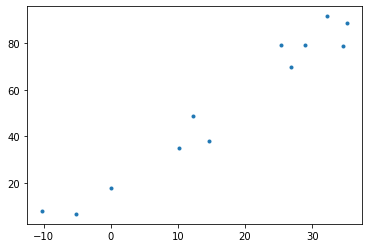

In [49]:
plt.plot(temp,icecream,'.')

- 온도와 아이스크림 판매량의 산점도 

(숨은진짜상황2)

$$\text{소아마비 반응수치} = 30 + 0.5 \times \text{온도} + \epsilon$$
- 좌변은 소아마비임을 나타내는 어떠한 반응수치라고 생각하자. 

In [50]:
np.random.seed(2) 
eps = np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + eps

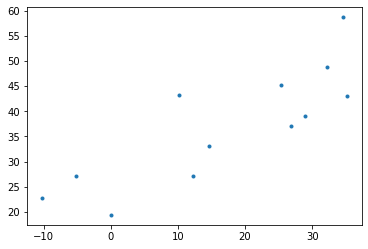

In [51]:
plt.plot(temp,disease,'.')

- 온도와 소아마비의 산점도 

**(우리가 데이터로부터 관측한 상황)**

`-` 아이스크림과 질병의 산점도를 그려보자. 

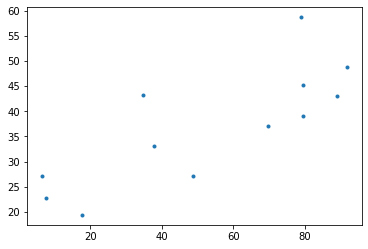

In [52]:
plt.plot(icecream,disease,'.')

- 양의 상관관계에 있다. 

`-` 아이스크림 중 어떠한 물질이 소아마비를 일으키는것이 분명하므로 (인과성이 분명해보이니까) 아래와 같은 모형을 세우자. <-- 여기서부터 틀렸음 

$${\tt disease}_i =\beta_0 +\beta_1 {\tt icecream}_i +\epsilon_i,\quad \textbf{for} ~~ i=1,2,\dots, 12$$

`-` 적절한 $\beta_0$와 $\beta_1$을 추정하면 우리는 아이스크림과 소아마비의 관계를 알 수 있다. <-- 틀린주장 

- 틀린 모형 
- 도데체 우리가 뭘 잘못했는가? 

`-` 두 변수 사이에 상관관계가 있어도 실제 원인은 다른 변수에 숨겨져 있는 경우가 많다. 

(ex1) 

- 온도 $\to$ 익사
- 온도 $\to$ 아이스크림 
- 아이스크림과 익사자도 양의 상관관계에 있을것이다. 
- 아이스크림을 먹이면 물에 빠져 죽는다 $\to$ 틀린주장 
- 사실 기온이 숨겨진 원인이다. 기온이 증가하면 아이스크림 판매량도 증가하고 폭염때문에 익사사고율도 높아지는 구조이다. 

(ex2) 

- 인구수 $\to$ 교회 
- 인구수 $\to$ 범죄건수 
- 지역별 교회와 범죄건수를 살펴보면 상관관계가 높게 나올것임 
- 교회를 지으면 범죄건수도 증가한다? $\to$ 틀린주장 
- 사실 인구가 숨겨진 요인임 

`-` ex2, ex1에 대하여 바른 분석을 하려면? 

- ex2: 인구가 비슷한 도시끼리 묶어서 비교해보면 교회와 범죄의 건수는 양의 상관관계에 있지 않을것임 
- ex1: 온도가 비슷한 그룹끼리 묶어보자. 

`-` 올바른 분석: 온도가 비슷한 그룹끼리 묶어서 그려보자. $\to$ 상관계수가 줄어들 것이다. 

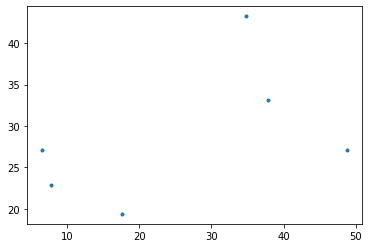

In [53]:
plt.plot(icecream[:6],disease[:6],'.')

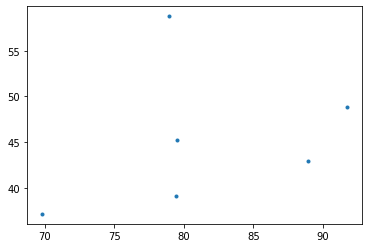

In [54]:
plt.plot(icecream[6:],disease[6:],'.')

- 진짜로 선형관계가 약해졌다.. 

# 숙제 (수업시간에 한 내용 X)

In [64]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[4,5,6,7]})
df

,a,b,c,d
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


아래의 결과를 관찰하고 drop의 기능을 유추하라. 

(예시1)

In [65]:
df.drop(columns='a')

,b,c,d
0,2,3,4
1,3,4,5
2,4,5,6
3,5,6,7


(예시2)

In [66]:
df.drop(columns=['a','b'])

,c,d
0,3,4
1,4,5
2,5,6
3,6,7


(예시3)

In [67]:
df.drop(index=0)

,a,b,c,d
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


(예시4)

In [71]:
df.drop(index=range(2,4))

,a,b,c,d
0,1,2,3,4
1,2,3,4,5


문제: `df` 에서 a,c열을 삭제하고 첫행을 삭제하라. 

In [78]:
#출력결과는 아래와 같아야 한다. 

,b,d
1,3,5
2,4,6
3,5,7
